# Comportamiento de la catidad de infectados COVID-19 

El crecimiento de contagio de la enfermedad COVID-19 causada por el virus SARS-CoV-2, se comporta de una manera que puede ser modelada muy bien con funciones exponenciales. Por ello, se habla de que el crecimiento de contagios es exponencial. Y dado que, como vimos, estamos hablando de funciones que crecen de una manera pavorosa en poco tiempo.

Un detalle que la convirtió en pandemia, es su bajo índice de letalidad. El Ébola, por ejemplo, con un índice de letalidad que llegó al 90% en ciertos brotes, no se convirtió en pandemia porque si bien era muy contagioso, los afectados no daban tiempo a expandir la enfermedad porque morían pronto.

Se hablaba mucho de que con la cuarentena se buscaba aplanar la curva de contagios con el fin de que el sistema de salud no colapse, y de esa manera, todos los infectados puedan ser atendidos en las mejores condiciones posibles. Pero ¿a qué se refieren concretamente con aplanar una curva y de qué curva hablan?

Tomando datos del Ministerio de Salud de la Nación, realicé una interpolación de dichos datos, y luego de haber hallado la función exponencial que mejor ajustaba, extrapolé a futuro la función que ajustaba el comienzo de la muestra, a fin de ver cuán eficiente estaba resultando la cuarentena.

Los datos a los que me refiero consisten en la cantidad de infectados detectados acumulados para cada día desde el primer contagio detectado el 03 de marzo (al que llamaré día t = 1 de la muestra en los gráficos), hasta el día 31 de mayo (día t = 90). Hago hincapié en detectados, porque la muestra no refleja la cantidad de infectados reales que existen en la población, sino solamente en aquellos casos testeados que dieron positivo. Graficando dichas cantidades en función de los días, se obtienen los puntos negros del gráfico de la Fig.1, que representé en escala logarítmica para hacer más visibles los detalles.

Fuente de los datos: https://www.argentina.gob.ar/salud/epidemiologia/vigilancia-epidemiologica/reportes-sobre-covid-19-en-argentina

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Leer archivo CSV
file_path = 'covid_19.csv'  # Reemplaza con el nombre del archivo si es distinto
df = pd.read_csv(file_path)

In [3]:
# Calcular acumulado de infectados
df['acumulado_infectados'] = df['infectados'].cumsum()

In [4]:
df

,fecha,dia_numero,infectados,acumulado_infectados
0,03/03/20,1,1,1
1,04/03/20,2,0,1
2,05/03/20,3,1,2
3,06/03/20,4,2,4
4,07/03/20,5,0,4
...,...,...,...,...
85,27/05/20,86,706,13935
86,28/05/20,87,769,14704
87,29/05/20,88,717,15421
88,30/05/20,89,795,16216


In [5]:
# Filtrar los valores positivos para evitar problemas con log(0)
filtered_df = df[df['acumulado_infectados'] > 0]

In [6]:
# Extraer columnas necesarias
x = filtered_df['dia_numero']
y = filtered_df['acumulado_infectados']

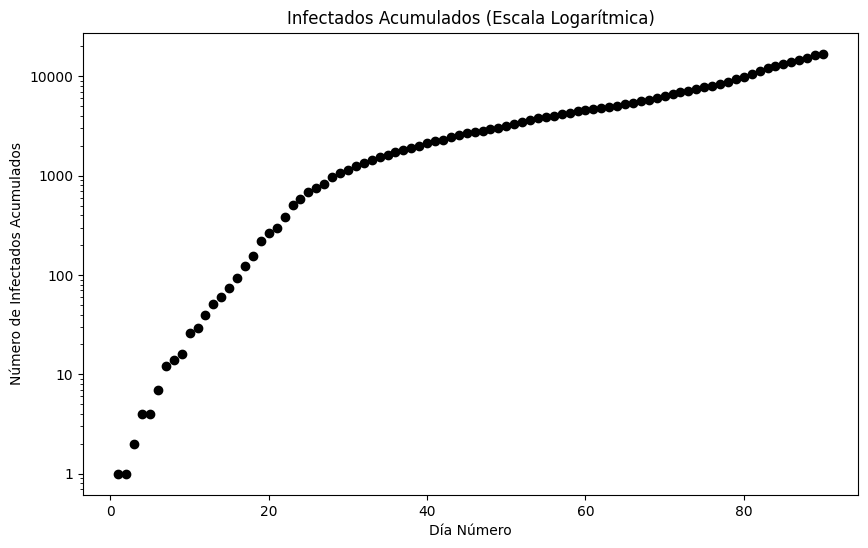

In [7]:
# Crear gráfica en escala logarítmica con puntos
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label="Infectados acumulados")  # Usamos scatter para mostrar solo puntos
plt.yscale('log')  # Escala logarítmica
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Formato normal para eje Y
plt.title('Infectados Acumulados (Escala Logarítmica)')
plt.xlabel('Día Número')
plt.ylabel('Número de Infectados Acumulados')
plt.grid(True, which="both", linestyle='', linewidth=0.5)
#plt.legend()
plt.show()

Lo primero que salta a la vista es que hay un quiebre en la muestra que se da entre los días 26 (t = 24) y 27 (t = 25) de marzo, haciendo evidente un aplanamiento de la curva de contagios producto, fundamentalmente, del aislamiento poblacional (cuarentena). La afirmación de que, efectivamente, el aplanamiento se da en esas fechas.


Ecuación ajustada: y = 2.90 * e^(0.2223 * x)


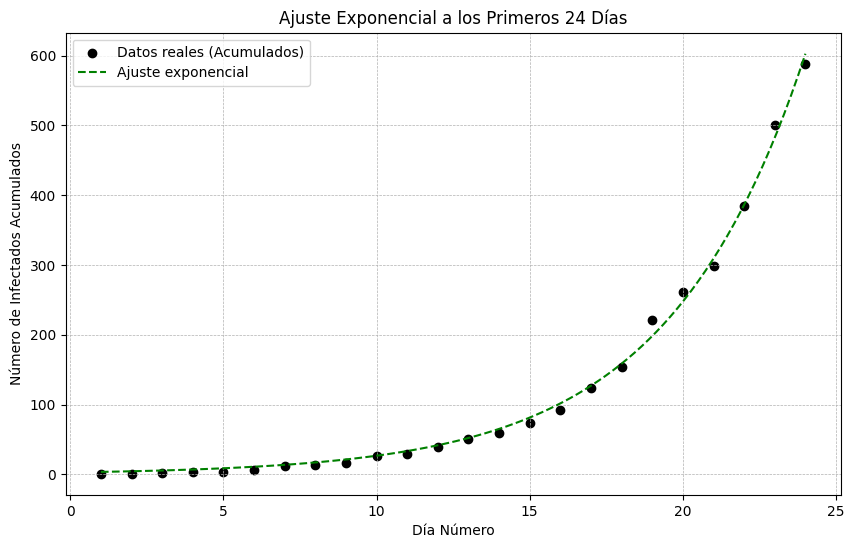

In [15]:
# Filtrar los primeros 26 días con datos positivos
filtered_df = df[(df['acumulado_infectados'] > 0) & (df['dia_numero'] <= 24)]
# Extraer columnas necesarias
x = filtered_df['dia_numero'].values
y = filtered_df['acumulado_infectados'].values
# Definir la función exponencial
def exponential(x, a, b):
    return a * np.exp(b * x)

# Ajustar los datos a la función exponencial
params, covariance = curve_fit(exponential, x, y)

# Obtener los parámetros ajustados
a, b = params
print(f"Ecuación ajustada: y = {a:.2f} * e^({b:.4f} * x)")

# Generar valores ajustados
x_fit = np.linspace(min(x), max(x), 100)
y_fit = exponential(x_fit, a, b)
# Graficar los datos reales y la curva ajustada
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label="Datos reales (Acumulados)")
plt.plot(x_fit, y_fit, color='green', linestyle='--', label="Ajuste exponencial")
plt.title('Ajuste Exponencial a los Primeros 24 Días')
plt.xlabel('Día Número')
plt.ylabel('Número de Infectados Acumulados')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

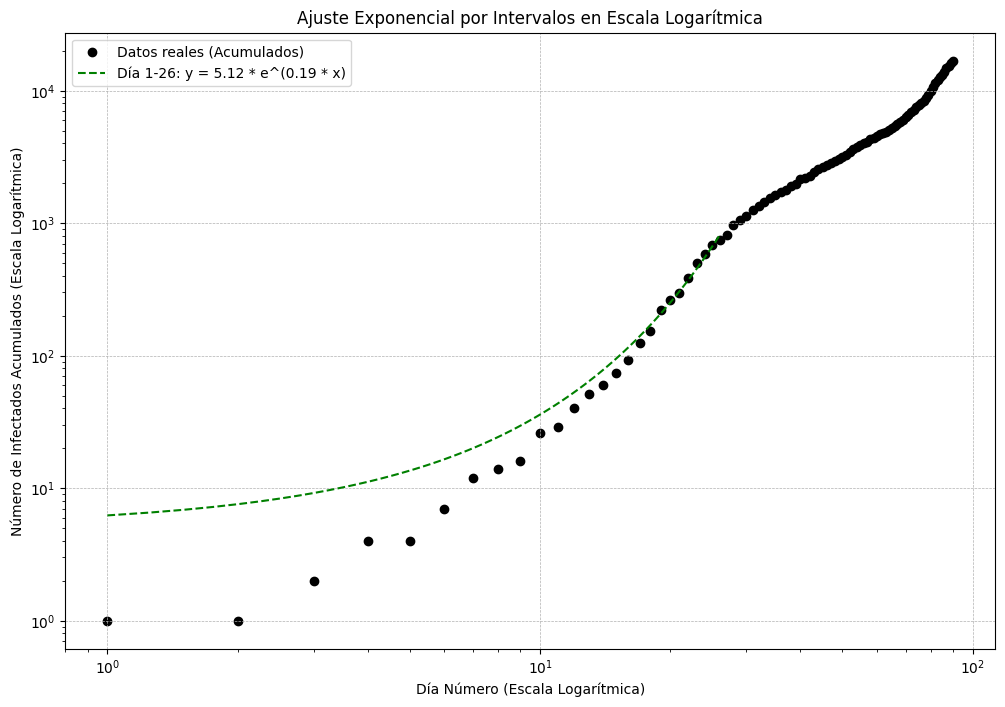

Ecuación para Día 1-24: y = 5.12 * e^(0.19 * x)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Leer archivo CSV
file_path = 'covid_19.csv'  # Reemplaza con el nombre del archivo si es distinto
df = pd.read_csv(file_path)

# Calcular acumulado de infectados
df['acumulado_infectados'] = df['infectados'].cumsum()

# Definir la función exponencial
def exponential(x, a, b):
    return a * np.exp(b * x)

# Función para ajustar los datos y graficar
def ajustar_intervalo(df, inicio, fin, color, label):
    # Filtrar los datos para el intervalo
    intervalo_df = df[(df['dia_numero'] >= inicio) & (df['dia_numero'] <= fin)]
    x = intervalo_df['dia_numero'].values
    y = intervalo_df['acumulado_infectados'].values

    # Ajustar los datos a la función exponencial
    params, _ = curve_fit(exponential, x, y)
    a, b = params

    # Generar valores ajustados
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = exponential(x_fit, a, b)

    # Graficar el ajuste
    plt.plot(x_fit, y_fit, color=color, linestyle='--', label=f'{label}: y = {a:.2f} * e^({b:.2f} * x)')

    return a, b

# Crear gráfico
plt.figure(figsize=(12, 8))

# Graficar los puntos reales de infectados acumulados
plt.scatter(df['dia_numero'], df['acumulado_infectados'], color='black', label="Datos reales (Acumulados)")

# Ajuste para los días 1 al 26
a1, b1 = ajustar_intervalo(df, 1, 26, 'green', 'Día 1-26')



# Configuración del gráfico con escala logarítmica
plt.title('Ajuste Exponencial por Intervalos en Escala Logarítmica')
plt.xlabel('Día Número (Escala Logarítmica)')
plt.ylabel('Número de Infectados Acumulados (Escala Logarítmica)')
plt.xscale('log')  # Escala logarítmica para el eje X
plt.yscale('log')  # Escala logarítmica para el eje Y
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar gráfico
plt.show()

# Imprimir ecuaciones ajustadas con 20 decimales
print(f"Ecuación para Día 1-24: y = {a1:.2f} * e^({b1:.2f} * x)")


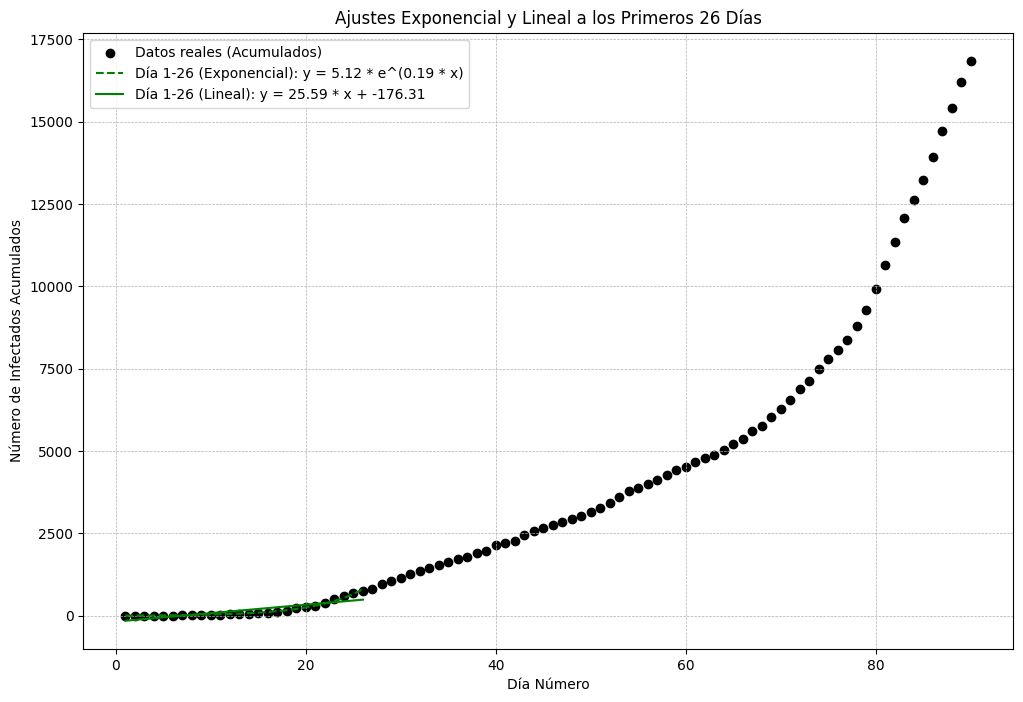

Ecuación ajustada (Exponencial) para Día 1-26: y = 5.12 * e^(0.19 * x)
Ecuación ajustada (Lineal) para Día 1-26: y = 25.59 * x + -176.31


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Leer archivo CSV
file_path = 'covid_19.csv'  # Reemplaza con el nombre del archivo si es distinto
df = pd.read_csv(file_path)

# Calcular acumulado de infectados
df['acumulado_infectados'] = df['infectados'].cumsum()

# Definir la función exponencial
def exponential(x, a, b):
    return a * np.exp(b * x)

# Función para ajustar los datos y graficar
def ajustar_intervalo(df, inicio, fin, color, label):
    # Filtrar los datos para el intervalo
    intervalo_df = df[(df['dia_numero'] >= inicio) & (df['dia_numero'] <= fin)]
    x = intervalo_df['dia_numero'].values
    y = intervalo_df['acumulado_infectados'].values

    # Ajuste exponencial
    params, _ = curve_fit(exponential, x, y)
    a, b = params

    # Generar valores ajustados para la función exponencial
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = exponential(x_fit, a, b)

    # Ajuste lineal
    m, c = np.polyfit(x, y, 1)  # m es la pendiente y c es la intersección
    y_fit_lineal = m * x_fit + c

    # Graficar el ajuste exponencial
    plt.plot(x_fit, y_fit, color=color, linestyle='--', label=f'{label} (Exponencial): y = {a:.2f} * e^({b:.2f} * x)')
    
    # Graficar el ajuste lineal
    plt.plot(x_fit, y_fit_lineal, color=color, linestyle='-', label=f'{label} (Lineal): y = {m:.2f} * x + {c:.2f}')

    return a, b, m, c

# Crear gráfico
plt.figure(figsize=(12, 8))

# Graficar los puntos reales de infectados acumulados
plt.scatter(df['dia_numero'], df['acumulado_infectados'], color='black', label="Datos reales (Acumulados)")

# Ajuste para los días 1 al 26
a1, b1, m1, c1 = ajustar_intervalo(df, 1, 26, 'green', 'Día 1-26')

# Configuración del gráfico con escala logarítmica
plt.title('Ajustes Exponencial y Lineal a los Primeros 26 Días')
plt.xlabel('Día Número')
plt.ylabel('Número de Infectados Acumulados')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar gráfico
plt.show()

# Imprimir ecuaciones ajustadas con 2 decimales
print(f"Ecuación ajustada (Exponencial) para Día 1-26: y = {a1:.2f} * e^({b1:.2f} * x)")
print(f"Ecuación ajustada (Lineal) para Día 1-26: y = {m1:.2f} * x + {c1:.2f}")


In [10]:
import math

# Obtener el valor de e
e_value = math.e

In [11]:
5.12 * e_value**(0.1947 * 35)

4664.119917743954

In [20]:
5.12 * e_value**(0.1947 * 90)

208647010.91185558

In [21]:
25.59 * 90 + -176.31


2126.79

Interpolando los datos desde 𝑡 = 1 hasta 𝑡 = 25, se obtiene una función exponencial que, al extrapolarla más allá de ese intervalo, predice que el número de casos acumulados alcanzaría los 4664 contagiados el 23 de abril (cuando t=35). Sin embargo, los datos reales mostraron que en esa fecha había solo 1627 casos acumulados, momento en el que se flexibilizó la cuarentena. Si se siguiera extrapolando la curva hasta t=90, el modelo predice que los casos acumulados llegarían a 208.647.010, una cifra absolutamente fuera de la realidad, ya que supera la población total de Argentina. En cambio, el número real de infectados al día 90 fue de 16.853.

Matemáticamente, este análisis sugiere que la cuarentena fue una medida acertada, ya que su implementación evitó que los casos siguieran una proyección exponencial insostenible.